In [1]:
import time
import gym
import tensorflow as tf
import numpy as np

In [2]:
env=gym.make('Alien-v0')
action_space_len=env.action_space.n
print(env.action_space)
print(env._max_episode_steps)

Discrete(18)
10000


In [3]:
scores=[]
train_data=[]
accepted_score=[]
required_score=200

for i in range(200):
    env.reset()
    score=0
    game_memory=[]
    prev_obs=[]
    for j in range(3000):
        
        action=env.action_space.sample()
        obs,reward,done,info=env.step(action)
        ###########
        reward-=0.1
        ###########
        if len(prev_obs)>0:
            game_memory.append([prev_obs,action])
        prev_obs=obs
        
        #env.render()
        #time.sleep(0.013)
        score+=reward
        if done:            
            break
    scores.append(score)
    if score>required_score:
        accepted_score.append(score)
        for data in game_memory:
            train_data.append(data)
    if i %10==0:
        print(f'iter>{i}\tscore>{score}')

iter>0	score>76.50000000000148
iter>10	score>53.10000000000124
iter>20	score>110.60000000000257
iter>30	score>71.29999999999907
iter>40	score>72.40000000000107
iter>50	score>46.300000000000985
iter>60	score>117.90000000000337
iter>70	score>14.099999999999937
iter>80	score>79.99999999999967
iter>90	score>113.70000000000417
iter>100	score>620.0999999999797
iter>110	score>32.899999999998755
iter>120	score>193.20000000000513
iter>130	score>48.59999999999936
iter>140	score>91.8000000000049
iter>150	score>77.50000000000274
iter>160	score>117.50000000000001
iter>170	score>66.6
iter>180	score>136.10000000000468
iter>190	score>46.49999999999913


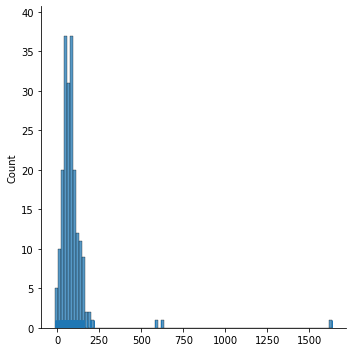

In [4]:
import seaborn as sns
sns.displot(scores,rug=True)

In [5]:
train_x=np.array([i[0] for i in train_data]).reshape(-1,210,160,3)
y_val=np.array([i[1] for i in train_data]).reshape(-1)
print(y_val.shape)
train_y=np.array(tf.one_hot(y_val,action_space_len)).reshape(-1,18)
train_x=train_x[:5000]
train_y=train_y[:5000]
#v=[0]*action_space_len
#train_y=[]
#idx=0
#for i in y_val:
#    train_y.append(np.array(v))
#    train_y[idx][i]=1
#    idx+=1
    
#train_y=np.array(train_y).reshape(-1,action_space_len)

(5538,)


In [6]:
print(train_x.shape)
print(train_y.shape)

(5000, 210, 160, 3)
(5000, 18)


In [7]:
model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(input_shape=(210,160,3),kernel_size=(3,3),filters=128),
        tf.keras.layers.MaxPool2D(strides=(2,2)),
        tf.keras.layers.Conv2D(kernel_size=(3,3),filters=256),
        tf.keras.layers.MaxPool2D(strides=(2,2)),
        tf.keras.layers.Conv2D(kernel_size=(3,3),filters=512),
        tf.keras.layers.MaxPool2D(strides=(2,2)),
        tf.keras.layers.Conv2D(kernel_size=(3,3),filters=256),
        tf.keras.layers.MaxPool2D(strides=(2,2)),
        tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64,activation='relu'),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(units=18,activation='softmax')
    ])
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 208, 158, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 104, 79, 128)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 102, 77, 256)      295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 38, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 36, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 18, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 16, 256)       1

In [8]:
#testval=model.predict(train_x[0].reshape(-1,210,160,3))
#print(testval)
print(train_x.shape)
print(train_y.shape)

(5000, 210, 160, 3)
(5000, 18)


In [9]:
hist=model.fit(train_x,train_y,epochs=10, validation_split=0.25)

Epoch 1/10
118/118 [==============================] - 16s 136ms/step - loss: 115.2436 - accuracy: 0.0573 - val_loss: 2.8909 - val_accuracy: 0.0464
Epoch 2/10
118/118 [==============================] - 16s 131ms/step - loss: 2.8901 - accuracy: 0.0619 - val_loss: 2.8912 - val_accuracy: 0.0464
Epoch 3/10
118/118 [==============================] - 16s 131ms/step - loss: 2.8900 - accuracy: 0.0619 - val_loss: 2.8916 - val_accuracy: 0.0464
Epoch 4/10
118/118 [==============================] - 16s 132ms/step - loss: 2.8898 - accuracy: 0.0619 - val_loss: 2.8917 - val_accuracy: 0.0464
Epoch 5/10
118/118 [==============================] - 16s 132ms/step - loss: 2.8897 - accuracy: 0.0619 - val_loss: 2.8920 - val_accuracy: 0.0464
Epoch 6/10
118/118 [==============================] - 16s 132ms/step - loss: 2.8897 - accuracy: 0.0619 - val_loss: 2.8921 - val_accuracy: 0.0464
Epoch 7/10
118/118 [==============================] - 16s 132ms/step - loss: 2.8896 - accuracy: 0.0619 - val_loss: 2.8923 - val_

In [10]:
model.save('qlearning-alien-v0.h5')

In [11]:
import matplotlib.pyplot as plt

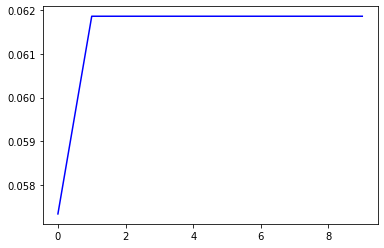

In [13]:
plt.plot(hist.history['accuracy'],'b-',label='accuracy')
plt.show()